# <center>ECSE 415 - Assignment 2</center>
  ### <center>Patrick Erath - 260719203 </center>

## 1 - Invariance of SIFT Features

### 1.1 Invariance Under Changes in Scale

1. Compute SIFT keypoints for the reference image

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in book
img = cv2.imread("book.jpg")

# Conver to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect the SIFT features with no masks
keypoints = sift.detect(img, None)
print("Number of keypoints:\t", len(keypoints))

#TODO? : draw keypoints

Number of keypoints:	 385


2. Scale Reference image using scaling factors of (0.2, 0.5, 0.8, 1.25, 2, 5)

In [39]:
# Create a rotated scaled duplicate by creating rotation matrices
# Rotation matrix around the center pixel with 0 degrees, and scale n
height, width = img.shape[0:2]
Scales = [0.2, 0.5, 0.8, 1.25, 2, 5]
imgs_arr = []

# Iterate over each scale and create a rotation matrix with
# center = (width/2, height/2)
# Then apply transformation matrix and append to image
for x in range(len(Scales)):
    M_temp = cv2.getRotationMatrix2D((width/2, height/2), 0, Scales[x])
    img_temp = cv2.warpAffine(img, M_temp, (width,height))
    imgs_arr.append(img_temp)

3. Compute SIFT keypoints for the transformed images

In [40]:
keypoints_arr = []
descriptors_arr = []
    
# Iterate over the scaled images and find the keypoint and descriptor for each
# Then append the keypoints and descriptors to keypoints & descriptor arrays
for i in range(len(imgs_arr)):
    keypoint_temp, descriptor_temp = sift.detectAndCompute(imgs_arr[i], None)
    print("Keypoint number for scaling factor: "+str(Scales[i])+" is: "+str(len(keypoint_temp)))
    keypoints_arr.append(keypoint_temp)
    descriptors_arr.append(descriptor_temp)

Keypoint number for scaling factor: 0.2 is: 42
Keypoint number for scaling factor: 0.5 is: 130
Keypoint number for scaling factor: 0.8 is: 305
Keypoint number for scaling factor: 1.25 is: 675
Keypoint number for scaling factor: 2 is: 1060
Keypoint number for scaling factor: 5 is: 271


4. Match all keypoints of the reference image to the transformed image using a brute-force method

In [41]:
# Create a BFMatcher object
bf = cv2.BFMatcher()

# Get descriptors for original image
keypoint_orig, descriptor_orig = sift.detectAndCompute(img, None)
matches_arr = []

# Match descriptors and append to matching array
for i in range(len(descriptors_arr)):
    match_temp = bf.match(descriptor_orig, descriptors_arr[i])
    matches_arr.append(match_temp)

5. Sort all matching keypoints according to the matching distance

In [42]:
# Sort descriptors according to the matching distance
for i in range(len(matches_arr)):
    matches_arr[i] = sorted(matches_arr[i], key = lambda x:x.distance)

6. Display top ten matched keypoints for each pair of reference image and a transformed image

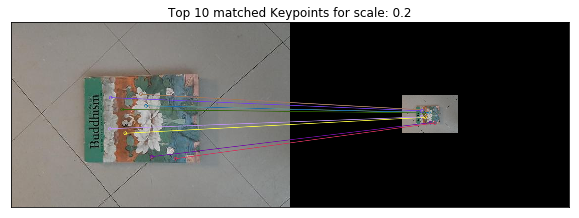

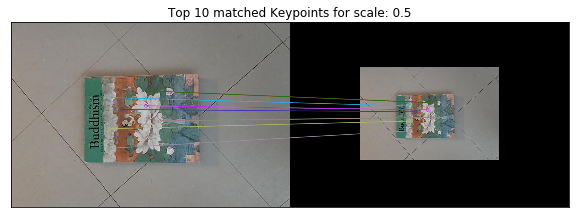

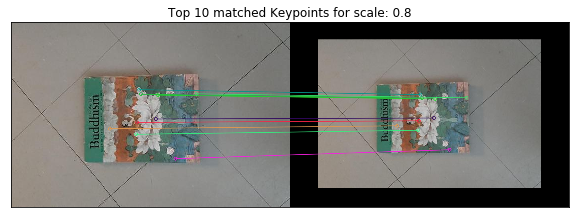

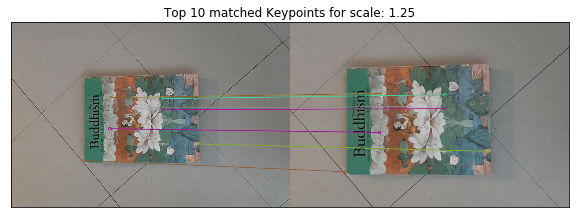

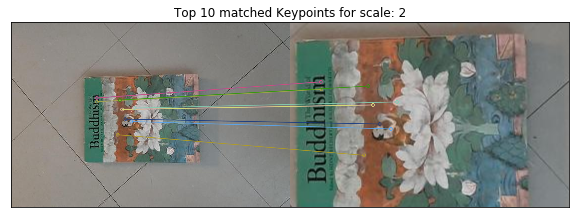

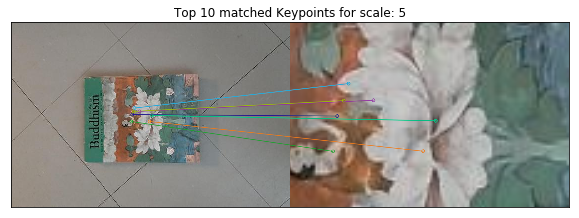

In [43]:
# Find top ten matched keypoints for each scaled image and display
for i in range(6):
    img_temp = cv2.drawMatches(img, keypoint_orig, 
                               imgs_arr[i], keypoints_arr[i],
                               matches_arr[i][:10], None, flags=2
                              )
    plt.figure(figsize=(10,10))
    plt.imshow(img_temp)
    plt.title("Top 10 matched Keypoints for scale: "+str(Scales[i]))
    plt.xticks([]), plt.yticks([])
plt.show()

7. Plot the matching distance for the top 100 matched keypoints. Plot indices of keypoints on x-axis and corresponding matching distance on y-axis

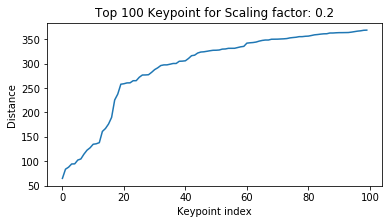

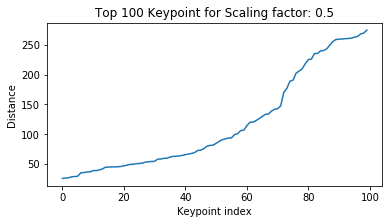

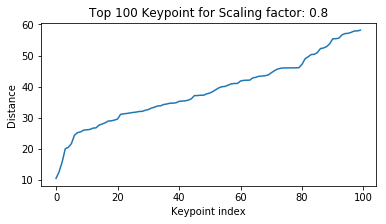

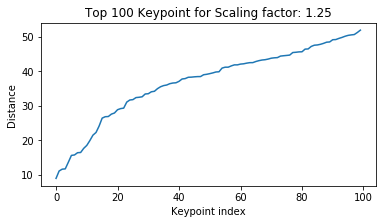

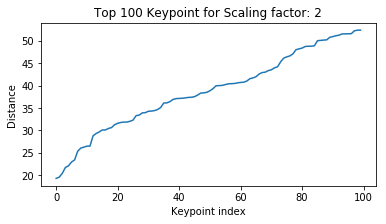

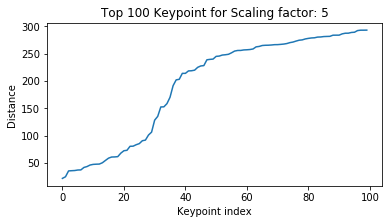

In [44]:
# Arrange matching keypoints in two seperate lists

x_axis = np.arange(100)      
for i in range(6):
    distance_temp = []
    for l, m in enumerate(matches_arr[i]):
        distance_temp.append(m.distance)

    plt.figure(figsize=(6,3))
    plt.plot(x_axis, distance_temp[:100])
    plt.title("Top 100 Keypoint for Scaling factor: "+str(Scales[i]))
    plt.xlabel("Keypoint index")
    plt.ylabel("Distance")
plt.show()

8. Discuss the trend in the plotted results. What is the effect of increasing the sacale on the matching distance? Reason the cause

# TODO !!!

### 1.2 Invariance under Rotation

1. Compute SIFT keypoints for the reference image

In [45]:
# Read in book
img = cv2.imread("book.jpg")

# Conver to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width = img.shape[0:2]

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect the SIFT features with no masks
keypoint, descriptor = sift.detectAndCompute(img, None)
print("Number of keypoints:\t", len(keypoint))

Number of keypoints:	 385


2. Rotate reference image at the angle of (10,30,90,150,170,180) degrees.

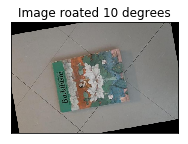

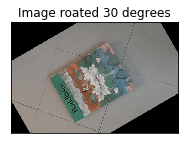

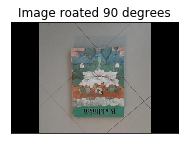

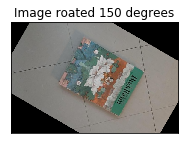

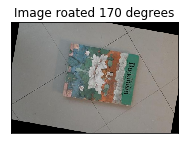

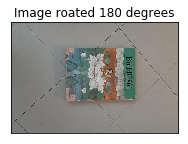

In [46]:
# Create an array of rotation matrices
# Rotation matrix each around center pixel with changing degrees
angles = [10,30,90,150,170,180]
rotated_images = []

for i in range(len(angles)):
    # Rotate the image
    M_temp = cv2.getRotationMatrix2D((width/2, height/2), angles[i], 1)
    rotated_images.append(cv2.warpAffine(img, M_temp, (width, height)))
    
    # Plot the image
    plt.figure(figsize=(3,3))
    plt.imshow(rotated_images[i]), plt.xticks([]), plt.yticks([])
    plt.title("Image roated "+str(angles[i])+" degrees")
    plt.show()


2. Compute SIFT keypoints for the transformed images

In [47]:
# Create a dictionary which holds a nested dictionary for each image
# The nested dictonary has two params: keypoint and discriptor
sift_dictionary = {}

# Create sift object
sift = cv2.xfeatures2d.SIFT_create()

for i in range(len(rotated_images)):
    temp_dict = {}
    temp_dict['keypoint'] = sift.detect(rotated_images[i], None)
    temp_dict['keypoint'], temp_dict['descriptor'] = sift.compute(rotated_images[i], temp_dict['keypoint'])
    sift_dictionary[i] = temp_dict
    print('N° keypoints for rotation angle: '+str(angles[i])+" is: "+str(len(temp_dict['keypoint'])))
    


N° keypoints for rotation angle: 10 is: 439
N° keypoints for rotation angle: 30 is: 446
N° keypoints for rotation angle: 90 is: 477
N° keypoints for rotation angle: 150 is: 446
N° keypoints for rotation angle: 170 is: 456
N° keypoints for rotation angle: 180 is: 400


4. Match all keypoints of the reference image to the transformed images using a brute-force method.

In [48]:
# Create a BFMatcher object (re-done for completion even though redundant)
bf = cv2.BFMatcher()

# Add matches to matches array
matches = []

for x in range(len(sift_dictionary)):
    #print(len(sift_dictionary[x]['descriptor']))
    matches.append(
    bf.match(descriptor, sift_dictionary[x]['descriptor'])
        )

5. Sort matching keypoints according to the matching distance

In [49]:
# Sort matching keypoints according to the matching distance
for match in matches:
    match = sorted(match, key = lambda x:x.distance)

6. Display top ten matching keypoints for each pair of reference image and a transformed image.

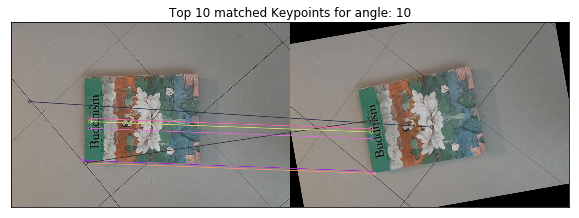

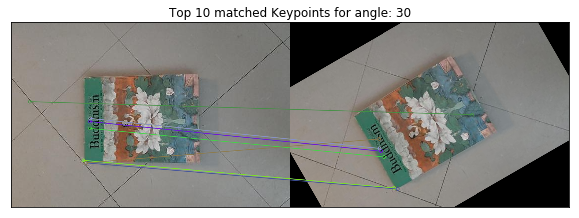

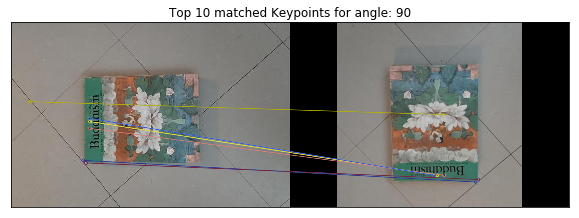

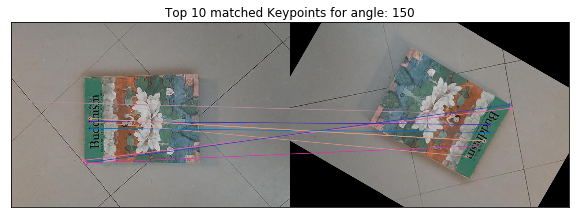

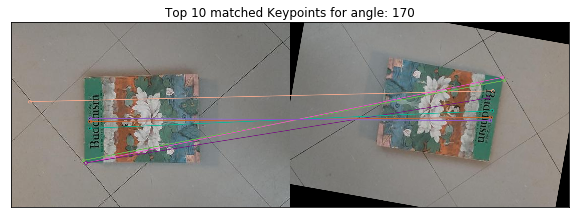

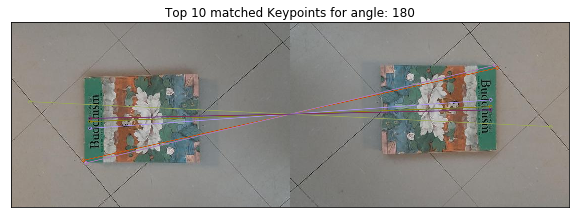

In [50]:
# Find top ten matched keypoints for each scaled image and display
for i in range(6):
    img_temp = cv2.drawMatches(img, keypoint, 
                               rotated_images[i], sift_dictionary[i]['keypoint'],
                               matches[i][:10], None, flags=2
                              )
    plt.figure(figsize=(10,10))
    plt.imshow(img_temp)
    plt.title("Top 10 matched Keypoints for angle: "+str(angles[i]))
    plt.xticks([]), plt.yticks([])
plt.show()

7. Plot the matching distance for top 100 matched keypoints. Plot indices of keypoints on x-axis and corresponding matching distance on y-axis

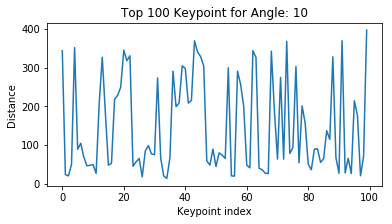

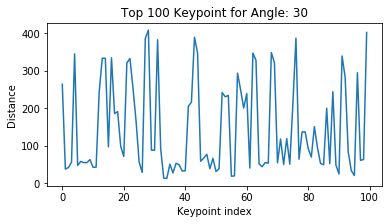

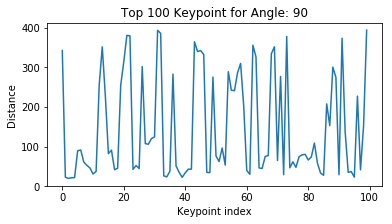

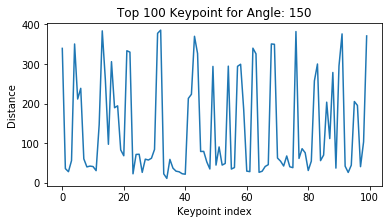

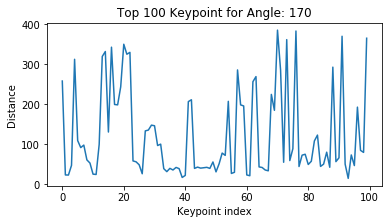

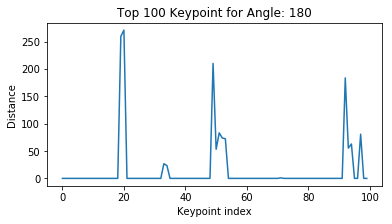

In [51]:
# Arrange matching keypoints in two seperate lists

x_axis = np.arange(100)      
for i in range(6):
    distance_temp = []
    for l, m in enumerate(matches[i]):
        distance_temp.append(m.distance)

    plt.figure(figsize=(6,3))
    plt.plot(x_axis, distance_temp[:100])
    plt.title("Top 100 Keypoint for Angle: "+str(angles[i]))
    plt.xlabel("Keypoint index")
    plt.ylabel("Distance")
plt.show()

# TODO !!!

## 2 - Matching using SIFT - Book Reveal 

(Text(0.5, 1.0, 'Top 10 Matching keypoints'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

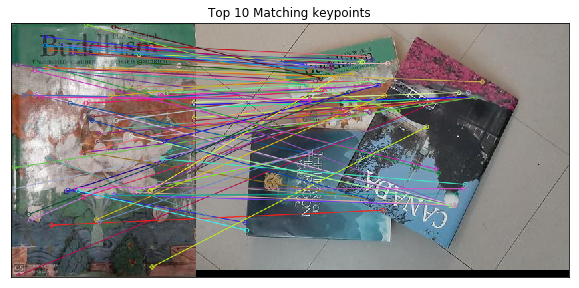

In [143]:
# Read in the two images
book_crop = cv2.imread('./book_crop.jpg')
book_occ = cv2.imread('./book_occlusion.jpg')

# Convert to RGB
book_crop = cv2.cvtColor(book_crop, cv2.COLOR_BGR2RGB)
book_occ = cv2.cvtColor(book_occ, cv2.COLOR_BGR2RGB)

# STEP 1 : Find SIFT keypoints for both input images
sift = cv2.xfeatures2d.SIFT_create()
keypoints_crop, descriptors_crop = sift.detectAndCompute(book_crop, None)
keypoints_occ, descriptors_occ = sift.detectAndCompute(book_occ, None)

# STEP 2 : Match keypoints of reference image (book_crop.jpg) to the 
#          keypoints of the occluded image using brute-force method
bf = cv2.BFMatcher()
matches = bf.match(descriptors_crop, descriptors_occ)

# STEP 3 : Sort matching keypoints according to matching distance
matches = sorted(matches, key = lambda x:x.distance)

# STEP 4 : Display top ten matching keypoints
imgmatch = cv2.drawMatches(book_crop, keypoints_crop,
                           book_occ, keypoints_occ,
                           matches[:100], None, flags=2
                           )
plt.figure(figsize=(10,10))
plt.imshow(imgmatch)
plt.title("Top 10 Matching keypoints"), plt.xticks([]), plt.yticks([])

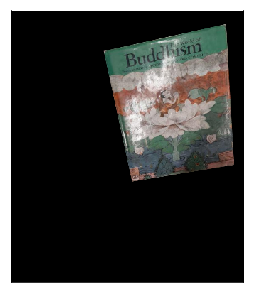

In [164]:
# Compute a homography to align the images using RANSAC method 
# Arrange matching keypoints in two seperate lists

# Arrange matching keypoints into two seperate lists
# Max_distance of 300 and MASK= 21 was found by running a for 
# loop with different combinations and plotting them all
GoodMatches = []
for i, m in enumerate(matches):
    if m.distance < 300:
        GoodMatches.append((m.trainIdx, m.queryIdx))

# Get the keypoints that are good matches
m_crop = np.float32([ keypoints_crop[i].pt for(__, i) in GoodMatches])
m_occ = np.float32([ keypoints_occ[i].pt for (i, __) in GoodMatches])

H,_ = cv2.findHomography(m_crop, m_occ, cv2.RANSAC, 21)
wimg = cv2.warpPerspective(book_crop, H, (width_c+50, height_c))
plt.figure(figsize=(5,5))
plt.imshow(wimg), plt.xticks([]), plt.yticks([])
plt.show()

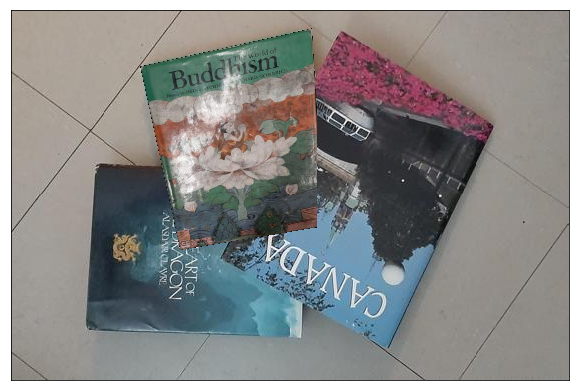

In [158]:
# Paste transformed reference image on the occluded 
# view to generate un-occluded view
img_disp = book_occ.copy()

for row in range(wimg.shape[0]):
    for col in range(wimg.shape[1]):
        if(wimg[row][col].any()!=0):
            img_disp[row][col]=wimg[row][col]

            
plt.figure(figsize=(10,10))
plt.imshow(img_disp), plt.xticks([]), plt.yticks([])
plt.show()

# 3 - Object Detection